In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('customer_churn_data.csv')

In [21]:
#df
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
5,CUST0005,Female,0,Yes,No,35,Yes,No,DSL,No,...,No,Yes,Yes,Yes,One year,No,Credit card,116.96,4093.60,No
6,CUST0006,Male,0,Yes,No,17,No,No phone service,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer,91.53,1556.01,Yes
7,CUST0007,Male,0,Yes,Yes,18,Yes,No,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,26.52,477.36,Yes
8,CUST0008,Male,0,No,No,27,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,67.77,1829.79,Yes
9,CUST0009,Female,0,No,No,15,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,86.45,1296.75,Yes


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [23]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
def Convert(value):
  if value == 1:
    return "Yes"
  else:
    return "No"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(Convert)

In [27]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,No,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,No,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,Yes,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,Yes,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,Yes,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
5,CUST0005,Female,No,Yes,No,35,Yes,No,DSL,No,...,No,Yes,Yes,Yes,One year,No,Credit card,116.96,4093.60,No
6,CUST0006,Male,No,Yes,No,17,No,No phone service,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer,91.53,1556.01,Yes
7,CUST0007,Male,No,Yes,Yes,18,Yes,No,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,26.52,477.36,Yes
8,CUST0008,Male,No,No,No,27,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,67.77,1829.79,Yes
9,CUST0009,Female,No,No,No,15,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,86.45,1296.75,Yes


#Converted Senior Citizen Values To Yes and No

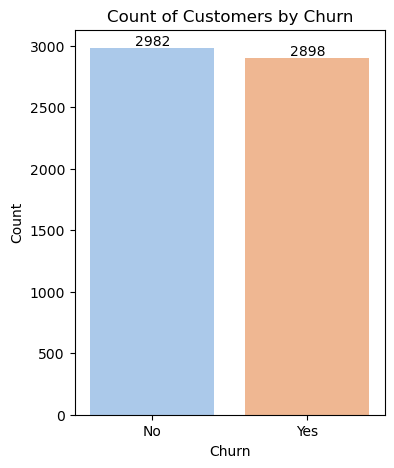

In [28]:
plt.figure(figsize=(4,5))
ax=sns.countplot(x ='Churn', data =df, palette="pastel", hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel("Count")
plt.title("Count of Customers by Churn")
plt.show()

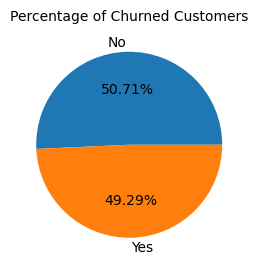

In [29]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct ="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#From the above pie chart we can conclude that 49.29% of our customers have churned out

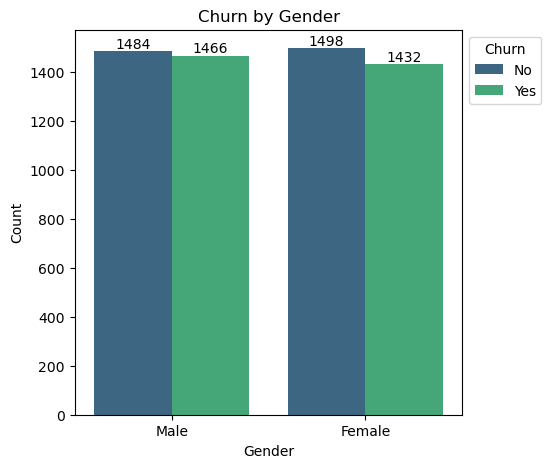

In [30]:
plt.figure(figsize=(5,5))
gender = sns.countplot(x='gender', data = df, hue ='Churn', palette="viridis")
gender.bar_label(gender.containers[0])
gender.bar_label(gender.containers[1])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn by Gender")
plt.legend(title='Churn', bbox_to_anchor = (1,1))
plt.show()

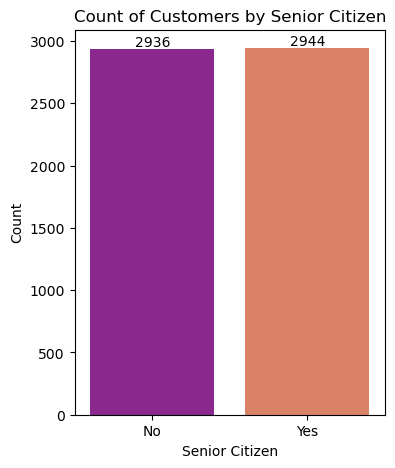

In [31]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x='SeniorCitizen', data = df, palette="plasma", hue='SeniorCitizen')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Count of Customers by Senior Citizen")
plt.show()

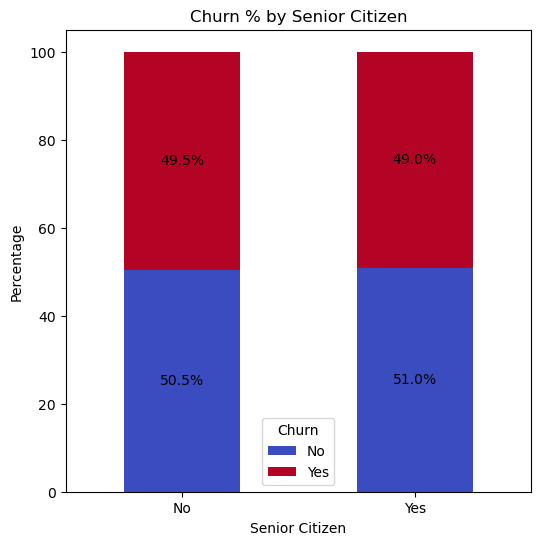

In [32]:
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
ax = ct_pct.plot(kind='bar', stacked=True, figsize=(6,6), colormap="coolwarm")
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")
plt.title("Churn % by Senior Citizen")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.show()

#Comparatively a slightly greater percentage of people in Senior Citizen category have churned out

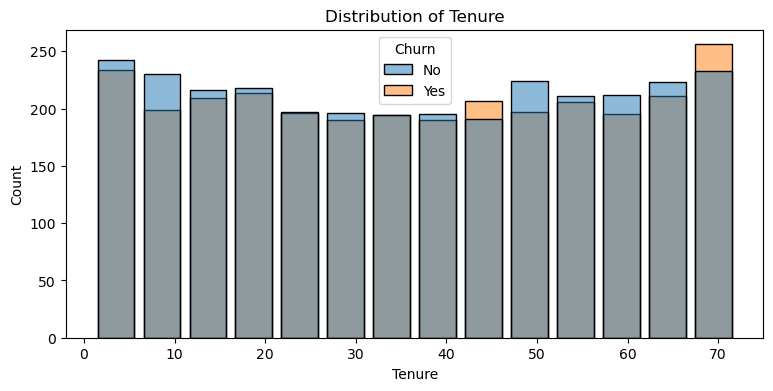

In [33]:
plt.figure(figsize=(9,4))
ax=sns.histplot(x='tenure', data=df, color ="#A7A2C6", shrink=0.8, bins = 14, hue='Churn')
#for container in ax.containers:
#  ax.bar_label(container)
plt.xlabel("Tenure")
plt.title("Distribution of Tenure")
plt.show()

#From the histogram we can conclude that the distribution of tenure is fairly uniform, but churn becomes more noticeable in the mid (40–50 months) and later (60–72 months) periods.

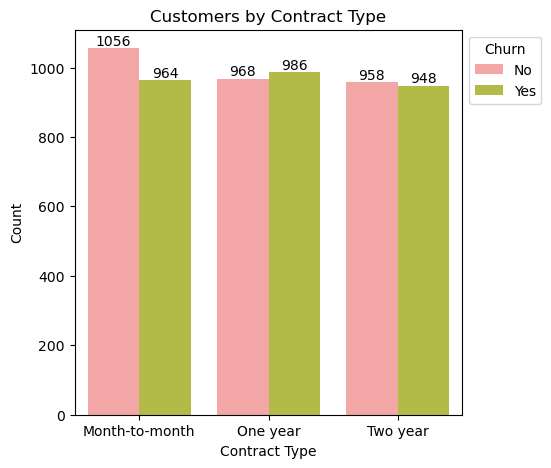

In [34]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Contract', data=df, palette=['#ff9999', '#C5CD35'], hue = 'Churn')
for label in ax.containers:
  ax.bar_label(label)
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("Customers by Contract Type")
plt.legend(title = "Churn", bbox_to_anchor = (1,1))
plt.show()

#From the above chart we can conclude that Customers on one-year contracts show the highest churn, followed closely by month-to-month contracts, while two-year contracts have the lowest churn

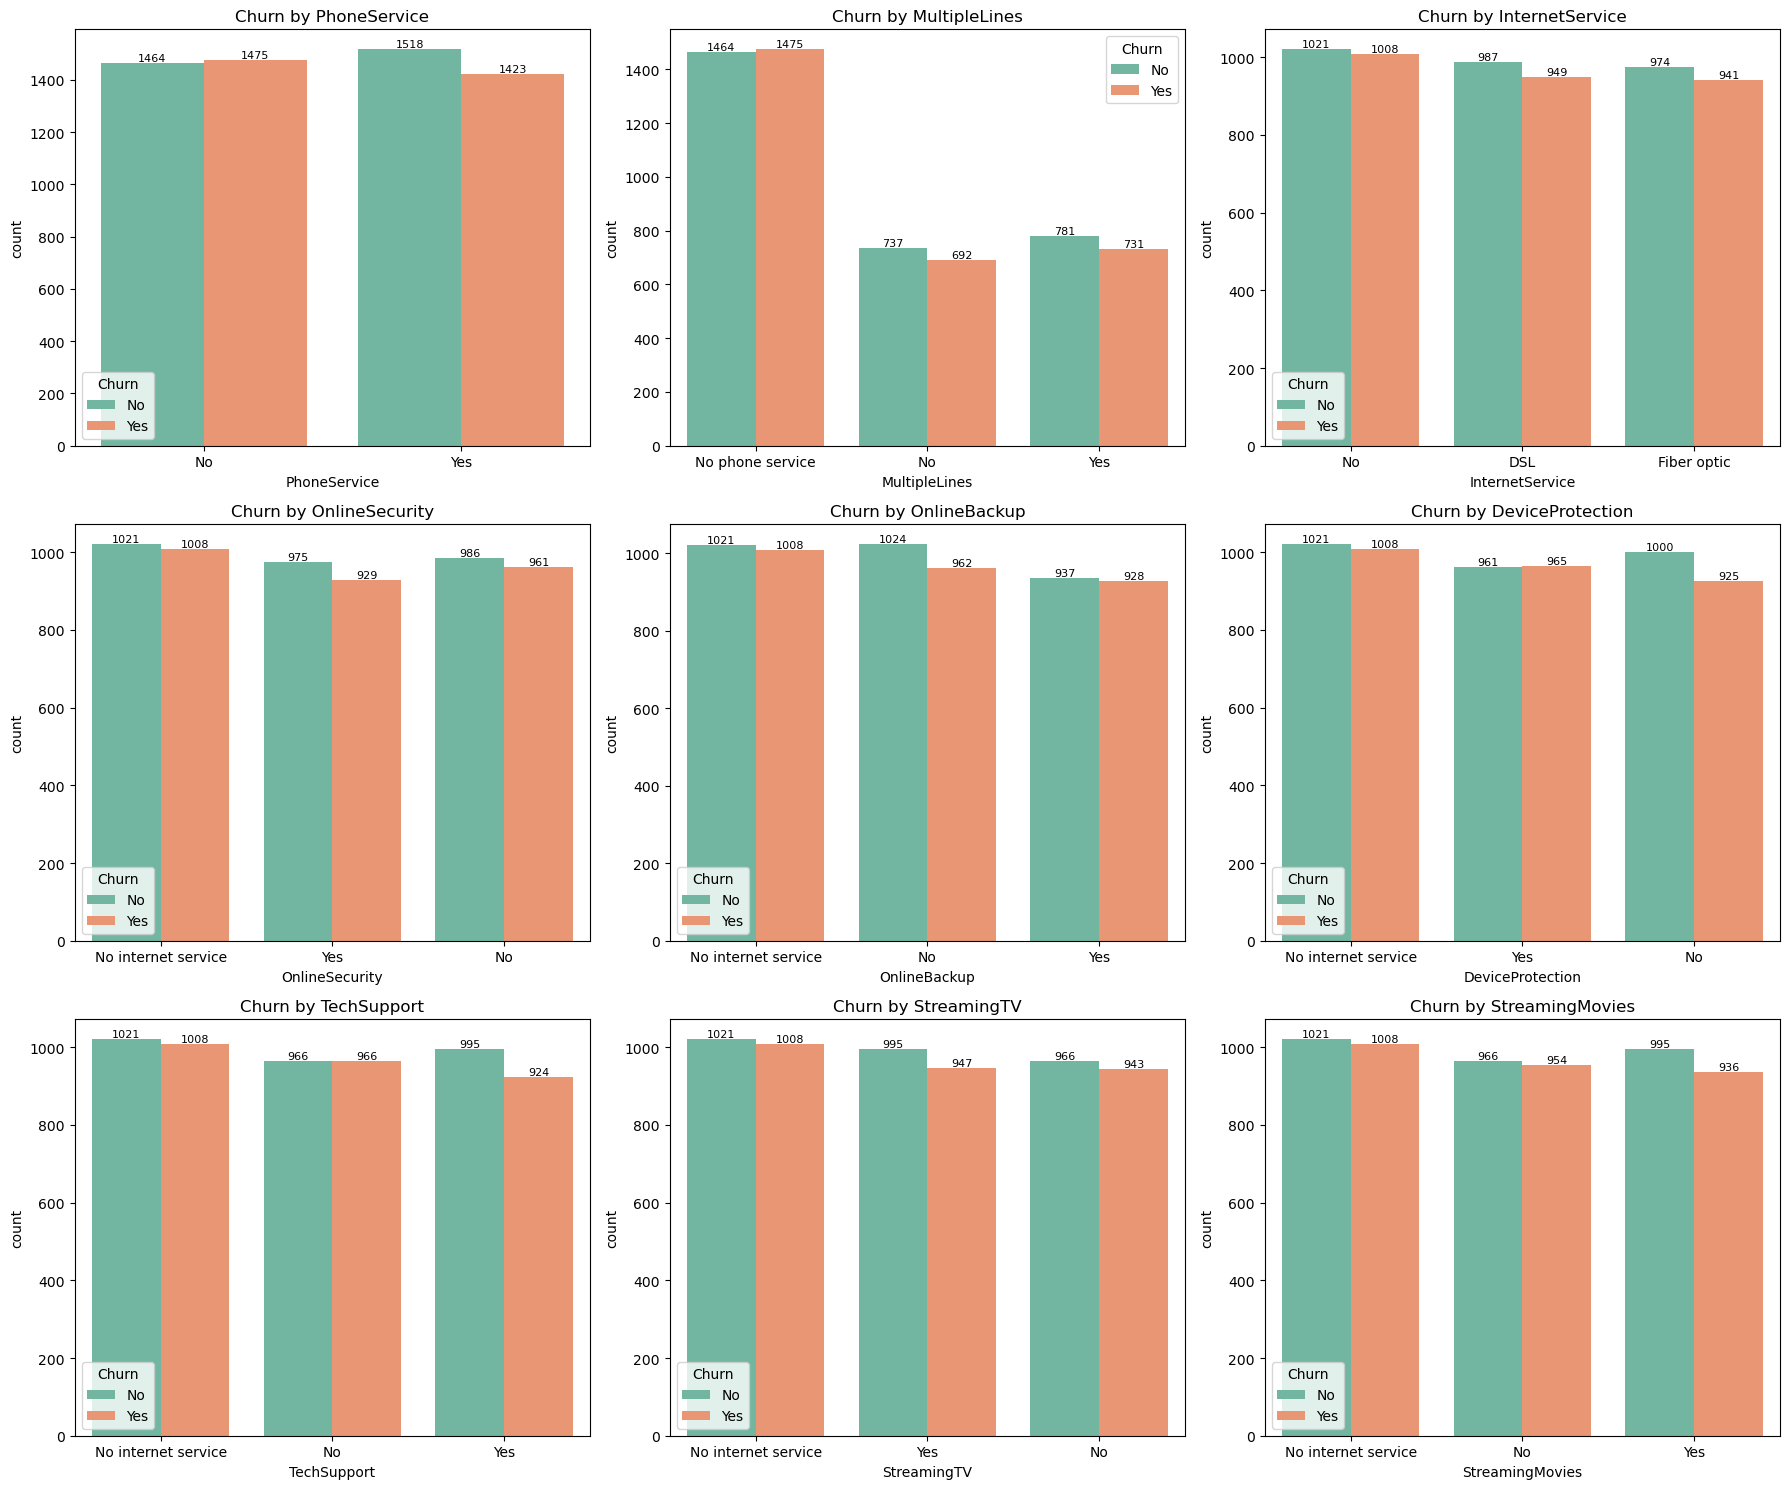

In [35]:
df.columns.values

cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()   

for i, col in enumerate(cols):
    ax = sns.countplot(x=col, data=df, hue="Churn", palette="Set2", ax=axes[i])
    ax.set_title(f"Churn by {col}")
    for container in ax.containers:   
        ax.bar_label(container, fontsize=8)

plt.tight_layout()
plt.show()


#From the above charts, phone services appear to have little impact on churn, but internet-related services such as online security, backup, device protection, and tech support show a stronger influence.  Customers with a broader service package, including these add-ons and support, are less likely to churn compared to those with only basic services.

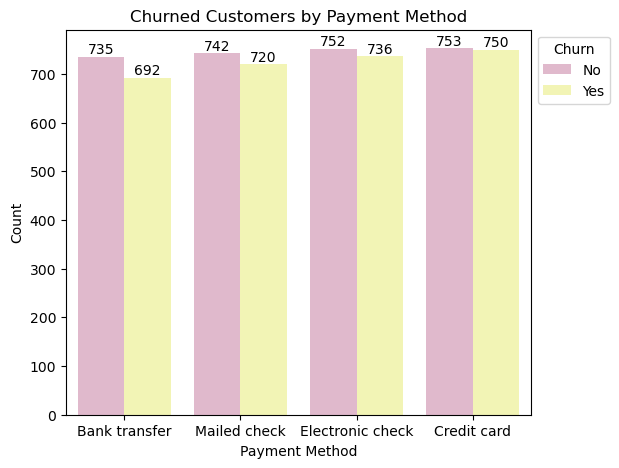

In [36]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x='PaymentMethod', palette =["#e6b3cc","#FCFFAB"], data=df, hue = 'Churn')
for label in ax.containers:
  ax.bar_label(label)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Churned Customers by Payment Method")
plt.legend(title = "Churn", bbox_to_anchor = (1,1))
plt.show()

#from the above chart we can conclude that customer is likely to churn when he is using credit card and electonic check as the payment method